# Práctica 3 - Credit Risk
## Data Preparation

### Octubre 2022


Miembros del grupo:
- 
- Lucía Bohórquez
- Isabel Marsá

In [56]:
# We will use pandas, a very widespread library in python
# In case you have never used it, or want to review its documentation
# These are some interesting docs:
# http://pandas.pydata.org/pandas-docs/stable/
# https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
# https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html
import pandas as pd
%matplotlib inline

En esta práctica haremos un análisis del impago de créditos. Definimos como impago al incumplimiento de las obligaciones o condiciones de un préstamo o crédito. Para ello utilizaremos un dataset con datos de 113,937 préstamos

### Lectura de los datos

Importamos el dataset que vamos a utilizar para la siguiente práctica. Como podemos ver el dataset contiene 113,937 filas y 81 columnas. También observamos el nombre de las columnas del dataset. 

In [57]:
# read_csv is the function that reads csvs, it returns a Pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [58]:
# Check number of rows and columns
print ('The DataSet has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The DataSet has 113937 rows and 81 columns


In [59]:
# Check the columns name
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

Algunas de las columnas claves del dataset son:

- **LoanStatus**: Esta variable representa el estado acual del prestamo. Puede tener las siguientes categorías: 'Cancelled', 'Chargedoff', 'Completed', 'Current', 'Default', 'FinalPaymentInProgress' y 'PastDue'. Hay que destacar que este último vendrá acompañado de un 'Delicuency bucket'


- **LoanMonthsSinceOrigination**: Esta variable representa el número de meses transcurridos desde la fecha de originación.


- **LoanFirstDefaultedCycleNumber**: Esta variable representa el ciclo del préstamo hasta que incurrió en Default.


- **LoanCurrentDaysDelinquent**: Esta variable representa el número de días en las que el préstamo incurrío en mora


# Performance & Sample Window

<AxesSubplot:>

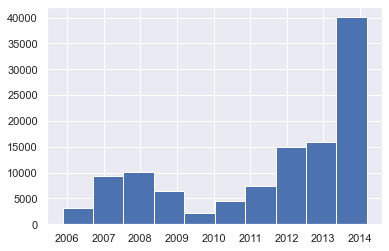

In [60]:
pd.to_datetime(df.LoanOriginationDate.str[:10]).hist()

En el histograma superior podemos observar el número de distintos préstamos que han sido originados desde 2006 hasta 2014. Se  puede destacar que en el momento posterior a la crisis de 2008-2009 se originaron la mayor parte de los préstamos. En 2008 se otorgaron alrededor de 10,000 préstamos. Además, en el 2014 se originaron la mayor parte de los préstamos del dataset.


**TODO 1** Seleccionar y razonar la columna que debería ser usada como input para nuestra variable objetivo. Existen dos opciones:
- Opción A: **LoanStatus** 
- Opción B: **LoanFirstDefaultedCycleNumber** 

In [61]:
df['LoanFirstDefaultedCycleNumber'].unique()

array([nan,  8.,  1., 18., 17., 31., 30.,  6.,  9.,  7., 27., 12., 15.,
       11., 28., 19., 16., 26., 23., 10., 32.,  0., 14., 13., 29.,  5.,
       22., 24., 35., 20., 25., 38., 36., 37., 21., 39., 40., 33., 34.,
       41., 42.,  4.,  2., 44.])

In [62]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

**LoanFirstDefaultedCycleNumber** será nuestra variable objetivo porque que se encuentra dentro del *sample window* (o ventana muestral). La variable LoanStatus no podrá ser utilizada como variable objetivo ya que contiene información a día de hoy y esta no puede estar dentro del sample window. Además, podemos observar que LoanFirstDefaultedCycleNumber contiene datos numéricos y datos NA, lo cual quiere decir que esa variable contiene información sobre si el préstamo fue pagado o no.

La ventana de observación (*observation window*) definirá qué margen temporal utilizaremos para tomar muestras para el modelo y las variables independientes (predictoras) se crearán teniendo en cuenta únicamente este periodo. La ventana de comportamiento (o *performance window*) es el periodo del que procede la variable dependiente/objetivo. Es el periodo en el cual vamos a estudiar el "comportamiento" de los préstamos que se concedieron en un momento dado, con el fin de asignarles la etiqueta de bueno o malo.

## Vintage analysis

El análisis Vintage nos permite entender el comportamiento de los prestamos con respecto al bad rate, para cada año de origen del préstamo, y para cada ventana en la que evaluamos si ha habido default. Este analisis será desarrollado a lo largo de la práctica. Antes de realizar el analisis los datos del dataset han sufrido transformaciones que se han considerado necesarias:

- Se ha pasado LoanMonthsSinceOrigination de meses a años para analizar hace cuantos años fue originado el prestamo
- LoanFirstDefaultedCycleNumber se ha transformado para obtener el trimestre en el que el préstamo incurrió en default.
- Se ha creado una nueva variable (N_loans) que indica el número de préstamos se otorgaron cada año. Para ello se ha utilizado la función .agg. También se añade la función reset_index que restablece el índice del Dataset, y utiliza el predeterminado en su lugar. Todo ello se ha añadido a un dataframe que llama df_vintage
- Para obtener la suma acumulada de los impagos por trimestre, quitamos los NAs y se hace la suma por mes y después la suma por trimestre. Vuelve a utilizar reset inde para indicar que el índice sea el predeterminado. Luego con la función list() convierte la columna indice en lista

In [63]:
## Years since loan origination
df['LoanMonthsSinceOriginationY'] = (df.LoanMonthsSinceOrigination / 12).round()
# Quarter in which the Loan defaulted
df['LoanFirstDefaultedCycleNumberQ'] = 4 * (df.LoanFirstDefaultedCycleNumber / 4).round()
# Get the number of loans per origination year
df_vintage = df.groupby('LoanMonthsSinceOriginationY').agg({'LoanMonthsSinceOriginationY': 'size'})\
                                                     .rename(columns={'LoanMonthsSinceOriginationY': 'N_loans'})\
                                                     .reset_index()


# For each year, compute the cummulative sum of defaulted loans per quarter
df['bad_aux'] = ~df['LoanFirstDefaultedCycleNumber'].isna()
df_def_per_cycle = pd.DataFrame(df.groupby(['LoanMonthsSinceOriginationY', 'LoanFirstDefaultedCycleNumberQ'])['bad_aux'].sum().groupby(level=[0]).cumsum()).reset_index()
df_def_per_cycle.columns = df_def_per_cycle.columns[:-1].tolist() +  ['N_bads']

# Merge both data sources, compute the bad rate
df_vintage = df_vintage.merge(df_def_per_cycle, on='LoanMonthsSinceOriginationY')
df_vintage['BR'] = 100. * df_vintage['N_bads'] / df_vintage['N_loans']

df_vintage.head()

,LoanMonthsSinceOriginationY,N_loans,LoanFirstDefaultedCycleNumberQ,N_bads,BR
0,0.0,29808,4.0,1,0.003355
1,0.0,29808,8.0,3,0.010064
2,1.0,21134,0.0,3,0.014195
3,1.0,21134,4.0,18,0.085171
4,1.0,21134,8.0,462,2.186051


In [64]:
# Transform from long to wide format
df_vin_pvt = df_vintage.pivot(index='LoanMonthsSinceOriginationY', columns='LoanFirstDefaultedCycleNumberQ', values='BR')
df_vin_pvt

LoanFirstDefaultedCycleNumberQ,0.0,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0,44.0
LoanMonthsSinceOriginationY,,,,,,,,,,,,
0.0,NaN,0.003355,0.010064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,0.014195,0.085171,2.186051,2.943125,3.368979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.039757,0.462181,5.342411,8.180101,12.160819,13.850512,15.132691,15.321539,15.326508,NaN,NaN,NaN
3.0,0.497830,0.931836,5.731427,8.424815,12.215982,14.003064,16.504978,17.870820,19.019658,19.211131,19.223896,NaN
4.0,1.117222,1.460983,4.417326,6.170505,8.765899,10.072190,12.220694,13.234789,14.575455,15.177037,15.830182,NaN
5.0,0.861009,NaN,6.150062,9.963100,14.022140,15.252153,17.958180,19.311193,20.541205,21.156212,22.017220,NaN
6.0,1.280445,1.851079,8.427279,12.985386,20.215727,23.291580,27.446068,29.485038,31.649269,32.713987,34.036186,34.043145
7.0,1.988015,2.872634,13.297822,18.814801,25.292495,28.659755,33.368211,35.708171,38.761533,40.017122,41.396366,NaN
8.0,1.276596,2.723404,11.177305,15.829787,22.978723,25.929078,29.900709,31.659574,34.269504,35.659574,36.964539,NaN


<AxesSubplot:xlabel='LoanFirstDefaultedCycleNumberQ'>

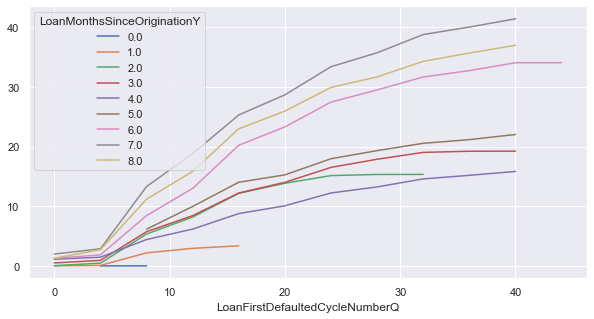

In [65]:
df_vin_pvt.transpose().plot(figsize=(10, 5))

**TODO 2** Explica qué aprendizajes se pueden leer en la gráfica anterior. Razona si los prestamos originados hace 7 años tienen un comportamiento parecido o diferente con respecto a los prestamos originados hace 3 años.

En el gráfico superior podemos observar la tasa de "malos" en distintos años y su progreso cada trimestre. Se puede comprobar que los préstamos más antiguos han sufrido más impagos. Los préstamos con más impagos se originaron hace 6, 7 y 8 años.
Por ejemplo, la tasa de malo más alta se dio en prestamos originados hace 7 años alcanzando en el mes 40 (trimestre 11) una tasa de 41.3963. Los prestamos que fueron originados hace 8 años, sufrieron una tasa de malos más baja pero que llegó a alcanzar 36.964539 y hace 6 años esta cifra llegó a 34.043145. 

Los **prestamos originados hace 7 años** tienen un comportamiento diferente a los prestamos originados hace menos como por ejemplo, **hace 3 años** siendo la tasa de malos mucho mayor en préstamos concedidos hace 7 años. Esto puede ser por el hecho de que hace unos años no había tanto control como ahora a la hora de conceder préstamos, que fue una de las razones por las que se originó la crisis financiera de 2007-2008.

Actualmente, los bancos tienen mucho mas control que antiguamente sobre la concesión de préstamos. Por ello, aquellos préstamos que se originaron más recientemente han sufrido menos impagos, por lo tanto tienen una tasa de malos mucho más baja que los más antiguos.

## Good, bad, indeterminate definition

**TODO 3** Implementa una función, que añada las siguientes columnas a nuestro dataframe df:
- **PW**: Captura si el préstamo tiene una madurez (LoanMonthsSinceOrigination) mayor que la PW (Performance window). La variable de entrada PW_size captura el número de meses de la PW.
- **fraud.**: Captura si el préstamo puede considerarse como un caso de fraude. En nuestro caso, consideramos fraude los préstamos que hayan tenido un evento de impago antes de TH_fraud.
- **bad.**: Captura si el préstamo cumple la condición de malo. En nuestro caso, que el evento de impago haya ocurrido después de TH_fraud, y antes del final de la PW
- **indeterm**: Captura si el préstamo se considera indeterminado. Definiremos indeterminados aquellos prestamos que han caído en impago después de la Performance window

In [66]:
# Use fraud threshold = 4 months

def generate_pop_flags(df, PW_size, TH_fraud=4):
    """Generates fraud, bad, and indeterminate columns
    
    Args:
        df: Pandas DataFrame with the input data
        PW_size: Int Performance window size (months)
        TH_fraud: Int number of months used as treshold for fraud
        
    Returns:
        Pandas DataFrame with the columns that capture
        PW, fraud, bad and indeterminate
    """
    ## Implement the function HERE ##
    
    
    #PW madurez
    df=df.copy()
    df['maduro'] = df.LoanMonthsSinceOrigination >= PW_size
    #Fraude
    df['fraud'] = df.LoanFirstDefaultedCycleNumber <= TH_fraud
    #Bad
    df['bad'] = (df.LoanFirstDefaultedCycleNumber > TH_fraud) & (df.LoanFirstDefaultedCycleNumber <= PW_size)
    #Indeterminado
    df['indet'] = (df.LoanFirstDefaultedCycleNumber > PW_size)
    return df

El tamaño del performance window (*PW_size*) define el margen temporal que utilizaremos para tomar muestras para el modelo. Deberá contener el numero mínimo de meses que el préstamo tiene que tener para que lo podamos considerar en nuestra muestra. Si por ejemplo *PW_size* es igual a 15, esto quiere decir que como mínimo tendríamos que estudiar el comportamiento del prestamo 15 meses. Es decir, si el impago es en el mes 16 se consideraría indeterminado. La performance window debe ser lo suficientemente grande como para tener suficientes eventos y que nuestro modelo sea bueno. Además, todo lo que ocurra fuera de la sample window, será invisible para nuestro modelo. Si tenemos un impago fuera de ese periodo, será considerado "bueno". A continuación, probaremos diferentes tamaños para la performance window y estudiaremos los distintos resultados. Se ha considerado un umbral de fraude (*TH_fraud*) de 4 meses.

**TODO 4** Para diferentes PW_size (se recomiendan evaluar los siguientes valores: 6, 9, 12, 15 y 18), evalúa el volumen y ratio de prestamos con madurez, prestamos fraudulentos, prestamos que cumplan la definición de bad, y préstamos que se consideren indeterminados. Por último, argumenta cuál es el valor de PW_size que se debería usar. La función se debe usar con el valor por defecto de  TH_fraud=4

A continuación probamos diferentes tamaños para el performance window y evaluamos los resultados para ver qué tamaño es el óptimo para nuestro modelo:

#### Tamaño de la ventana de comportamiento igual a 6 meses (PW_size=6):

In [67]:
PW_size = 6 # Aplica el valor determinado en el TODO anterior
df = generate_pop_flags(df, PW_size)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanMonthsSinceOriginationY,LoanFirstDefaultedCycleNumberQ,bad_aux,maduro,fraud,bad,indet
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0,0.0,258,6.0,NaN,False,True,False,False,False
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0,0.0,1,0.0,NaN,False,False,False,False,False
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0,0.0,41,7.0,NaN,False,True,False,False,False
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0,0.0,158,1.0,NaN,False,True,False,False,False
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0,0.0,20,0.0,NaN,False,True,False,False,False


In [68]:
rat_m_6= (len(df[df['maduro'] == True])/len(df))

print('El ratio de préstamos con madurez es de',rat_m_6 )

El ratio de préstamos con madurez es de 0.7663445588351457


In [69]:
rat_f_6=(len(df[df['fraud'] == True])/len(df))
print('El ratio de préstamos fraudulentos es de',rat_f_6 )

El ratio de préstamos fraudulentos es de 0.004932550444543915


In [70]:
rat_b_6=(len(df[df['bad'] == True])/len(df))

print('El ratio de préstamos que cumplen la función de bad es de',rat_b_6 )

El ratio de préstamos que cumplen la función de bad es de 0.009619351044875678


In [71]:
rat_i_6=(len(df[df['indet'] == True])/len(df))

print('El ratio de préstamos indeterminados es de',rat_i_6 )

El ratio de préstamos indeterminados es de 0.13423207562073777


#### Tamaño de la ventana de comportamiento igual a 9 meses (PW_size=9):

In [72]:
PW_size=9

Pw9=generate_pop_flags(df,PW_size)

In [73]:
rat_m_9= (len(Pw9[Pw9['maduro'] == True])/len(Pw9))

print('El ratio de préstamos con madurez es de',rat_m_9 )

El ratio de préstamos con madurez es de 0.6857737170541615


In [74]:
rat_f_9=(len(Pw9[Pw9['fraud'] == True])/len(Pw9))
print('El ratio de préstamos fraudulentos es de',rat_f_9 )


El ratio de préstamos fraudulentos es de 0.004932550444543915


In [75]:
rat_b_9=(len(Pw9[Pw9['bad'] == True])/len(Pw9))
print('El ratio de préstamos que cumplen la función de bad es de',rat_b_9 )


El ratio de préstamos que cumplen la función de bad es de 0.03371161255781704


In [76]:
rat_i_9=(len(Pw9[Pw9['indet'] == True])/len(Pw9))
print('El ratio de préstamos indeterminados es de',rat_i_9 )

El ratio de préstamos indeterminados es de 0.11013981410779641


#### Tamaño de la ventana de comportamiento igual a 12 meses (PW_size=12):

In [77]:
PW_size=12
Pw12=generate_pop_flags(df,PW_size)

In [78]:
rat_m_12= (len(Pw12[Pw12['maduro'] == True])/len(Pw12))
print('El ratio de préstamos con madurez es de',rat_m_12 )

El ratio de préstamos con madurez es de 0.6234673547662305


In [79]:
rat_f_12=(len(Pw12[Pw12['fraud'] == True])/len(Pw12))
print('El ratio de préstamos fraudulentos es de',rat_f_12 )


El ratio de préstamos fraudulentos es de 0.004932550444543915


In [80]:
rat_b_12=(len(Pw12[Pw12['bad'] == True])/len(Pw12))
print('El ratio de préstamos que cumplen la función de bad es de',rat_b_12 )


El ratio de préstamos que cumplen la función de bad es de 0.056145062622326374


In [81]:
rat_i_12=(len(Pw12[Pw12['indet'] == True])/len(Pw12))
print('El ratio de préstamos indeterminados es de',rat_i_12 )

El ratio de préstamos indeterminados es de 0.08770636404328708


#### Tamaño de la ventana de comportamiento igual a 15 meses (PW_size=15):


In [82]:
PW_size=15
Pw15=generate_pop_flags(df,PW_size)

In [83]:
rat_m_15= (len(Pw15[Pw15['maduro'] == True])/len(Pw15))
rat_f_15=(len(Pw15[Pw15['fraud'] == True])/len(Pw15))
rat_i_15=(len(Pw15[Pw15['indet'] == True])/len(Pw15))
rat_b_15=(len(Pw15[Pw15['bad'] == True])/len(Pw15))

#### Tamaño de la ventana de comportamiento igual a 18 meses (PW_size=18):


In [84]:
PW_size=18
Pw18=generate_pop_flags(df,PW_size)

In [85]:
vol18=len(Pw18)
rat_m_18= (len(Pw18[Pw18['maduro'] == True])/len(Pw18))
rat_f_18=(len(Pw18[Pw18['fraud'] == True])/len(Pw18))
rat_i_18=(len(Pw18[Pw18['indet'] == True])/len(Pw18))
rat_b_18=(len(Pw18[Pw18['bad'] == True])/len(Pw18))

In [86]:
rat_mad=[rat_m_6,rat_m_9,rat_m_12,rat_m_15,rat_m_18]

In [87]:
rat_fraud=[rat_f_6,rat_f_9,rat_f_12,rat_f_15,rat_f_18]

In [88]:
rat_bad=[rat_b_6,rat_b_9,rat_b_12,rat_b_15,rat_b_18]

In [89]:
rat_indet=[rat_i_6,rat_i_9,rat_i_12,rat_i_15,rat_i_18]

In [90]:
pw_size=[6,9,12,15,18]

In [91]:
dfnuevo = pd.DataFrame()

Habiendo definido estas variables, realizaremos un dataset que las incluya. Esto nos permitirá observar los distintos ratios pertenecientes a cada tamaño del performance window:

In [92]:
dfnuevo['Tamaño del PW']=pw_size
dfnuevo['Volumen']='113937'
dfnuevo['Madurez']=rat_mad
dfnuevo['Fraudulentos']=rat_fraud
dfnuevo['Malos']=rat_bad
dfnuevo['Indeterminados']=rat_indet
print('Tabla con los Ratios:')
dfnuevo


Tabla con los Ratios:


,Tamaño del PW,Volumen,Madurez,Fraudulentos,Malos,Indeterminados
0,6,113937,0.766345,0.004933,0.009619,0.134232
1,9,113937,0.685774,0.004933,0.033712,0.110140
2,12,113937,0.623467,0.004933,0.056145,0.087706
3,15,113937,0.591731,0.004933,0.075709,0.068143
4,18,113937,0.552893,0.004933,0.092639,0.051213


Hemos considerado que el tamaño de la ventana de comportamiento óptima es 12 meses por varias razones. Primero, contiene unos ratio de malos de 0.056 y pensamos que este ratio es suficiente para el análisis. Segundo, 12 meses es un tiempo suficientemente grande pero no excesivo, ya que 15 o 18 meses sería demasiado tiempo, por lo que cogería un ratio de malos mucho más grande y esto afectaría a nuestro modelo haciendolo demasiado exigente. Por otro lado, 6 o 9 meses consideramos que es demasiado corto y haría que nuestro modelo fuese muy poco exigente dado el ratio de malos tan bajo. 

Por ello, nos quedamos con un **tamaño de performance window igual a 12**.

In [93]:
## para asegurarme que estoy utilizando pw=12

PW_size = 12 # Aplica el valor determinado en el TODO anterior
df = generate_pop_flags(df, PW_size)

## First exclusion set

**TODO 5** Implementa una función que ejecutará las exclusiones a nuestro dataframe. La función debe excluir los siguientes préstamos:
- Préstamos que tengan una madurez menor que la PW
- Préstamos que se consideren como fraude
    

In [94]:
def filter_exclusions(df):
    """Function that handles the population definition
    
    Args:
        df: Pandas DataFrame with the in time input data
        
    Returns:
        Pandas DataFrame with the population definition applied
    """
    ## Implement the function HERE ##
    df = df[df['maduro'] == True] ## solamente me quedo con los que tengan madurez > PW
    df = df[df['fraud'] == False] ## Solamente me quedo con los que no cumplan la condición de fraude
    
    
    return df

In [95]:
df = filter_exclusions(df)
print ('The DataSet has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The DataSet has 70475 rows and 88 columns


## Ratio de Malos

In [96]:
df.bad.value_counts()

False    64266
True      6209
Name: bad, dtype: int64

In [97]:
100. * df.bad.value_counts() / df.shape[0]

False    91.189784
True      8.810216
Name: bad, dtype: float64

In [98]:
df[['ListingCreationDate', 'LoanOriginationDate']].head()

,ListingCreationDate,LoanOriginationDate
0,2007-08-26 19:09:29.263000000,2007-09-12 00:00:00
2,2007-01-05 15:00:47.090000000,2007-01-17 00:00:00
3,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00
10,2012-05-10 07:04:01.577000000,2012-05-17 00:00:00
11,2007-10-09 20:28:33.640000000,2007-10-18 00:00:00


In [99]:
df['LoanOriginationDate'] = pd.to_datetime(df.LoanOriginationDate.str[:10])
df['LoanOriginationYear'] = pd.to_datetime(df.LoanOriginationDate.values).year

## Additional exclusions

Una vez aplicadas las exclusiones anteriores, vamos a estudiar la tasa de malos por año de origen del préstamo.

**TODO 6** Implementa una función agregue los préstamos por año (LoanOriginationYear), y compute el número de prestamos, el número de "malos" y la tasa de malos.

In [100]:
def describe_yearly_BR(df,col_year, col_target):
    """Describes the yearly number of loans, bad loans and bad rate of the portfolio
    
    Args:
        df: Pandas DataFrame with the input data
        col_year: Name of the column that captures the loan origination date
        col_target: Name of the target column
        
    Returns:
        Pandas DataFrame with the yearly number of loans, bad 
        loans and bad rate of the portfolio 
    """
    ## Implement the function HERE ##
    
    counts=df["LoanOriginationYear"].value_counts()
    c=pd.DataFrame(counts)
    df8=pd.DataFrame(df,columns=['LoanOriginationYear','bad'])
    dfx=df8.groupby(['LoanOriginationYear']).agg({'bad': 'sum'})
    concat = pd.concat([c, dfx], axis=1,)
    concat['percentage%']=concat['bad']/concat['LoanOriginationYear']*100
    concat=concat.rename(columns={"LoanOriginationYear": "Count"})
    return concat
    

In [101]:
col_year =df["LoanOriginationYear"] # Fill the name of the year column
col_target = df["bad"]# Fill the name of the target column
dfyearly=describe_yearly_BR(df,col_year, col_target)
dfyearly

,Count,bad,percentage%
2005,22,0,0.000000
2006,5822,899,15.441429
2007,11240,1504,13.380783
2008,11411,1170,10.253264
2009,2032,98,4.822835
2010,5579,251,4.499014
2011,11208,819,7.307281
2012,19545,1341,6.861090
2013,3616,127,3.512168


Text(0.5, 1.0, 'Proporción de Malos por Año')

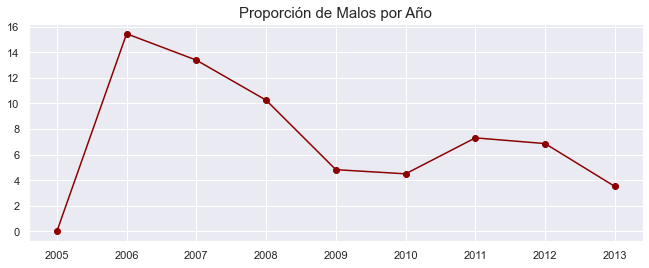

In [102]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11,4)})
ax=dfyearly['percentage%'].plot(marker='o',linestyle='-',color='darkred')
ax.set_title('Proporción de Malos por Año',fontsize=15)


El máximo porcentaje de malos pertenece al año 2006 con un total de 167 malos y un porcentaje de 2.86%. Esta cifra incrementó exponencialmente comparado al año anterior que hubo un total de 0 malos según nuestros datos. Se puede observar que a partir de 2009 esta cifra baja ya que los préstamos se concedieron con más control que los años anteriores. En 2009 se concedieron 2,032 de los cuales se calificaron como 'bad' únicamente 9. En 2010 esta cifra incrementa porque se concedieron más del doble de préstamos y el bad rate alcanza 0.66%.

**TODO 7** Usando los resultados obtenidos por la función describe_yearly_BR, define cuál será la Sample Window (qué años se consideraran para capturar préstamos en la población). La Sample Window debe de cumplir las siguientes condiciones: 
- Debe de tener un ratio de positivos (malos, en nuestro caso) aproximadamente constante
- Debe de capturar un periodo que en principio debería representar el entorno en que se usará el modelo
- Debe de capturar un periodo lo más reciente posible

Define también qué periodo temporal capturará la muestra IT (In Time), y la muestra OOT (Out of time).

Hemos considerado que la muestra de tiempo que más se ajusta a las condiciones mencionadas previamente son los años 2011 y 2012 porque cumple con las tres condiciones mencionadas. Tiene un ratio de malos casi constante, captura un periodo que representa el entorno que utilizaremos en el modelo y es el periodo más reciente. El año 2013 no lo meteremos en la Sample Window ya que su ratio de malos no es constante al de los años anteriores y tiene un valor muy bajo. Además, los años anteriores no tienen un ratio constante de malos ya que coincide con la crisis económica de 2008 y se puede ver como en 2006, 2007 y 2008 tienen los ratios más altos ya que durante esos años empezaron a darse prestamos a cualquiera lo que llevó a un incremento en este porcentaje de malos pagadores. Ya que como se lo daban a cualquiera que pedía un préstamo está claro que habría mayor numero de peores pagadores (en proporción al número de prestamos malos). 

### Final output sampling:

   

 - IT (In Time):
     - Train
     - Validation 
     - Reject Inference sample
 - OOT (Out of time)


In [103]:
df_it = df["LoanOriginationYear"]== 2011
# Keep the time period as defined in the previous TODO
# Split randomly in train, validation and RI
# - 60% Train, 20% val, 20% RI
df_train = df_it.sample(frac=0.6, random_state=42)
df_val_ri = df_it.loc[~df_it.index.isin(df_train.index)]
df_val = df_val_ri.sample(frac=0.5, random_state=42)
df_ri = df_val_ri.loc[~df_val_ri.index.isin(df_val.index)]

In [104]:
df_oot = df["LoanOriginationYear"]== 2012
# Keep the time period as defined in the previous TODO

In [105]:
len(df_it), len(df_train), len(df_val), len(df_ri), len(df_oot)

(70475, 42285, 14095, 14095, 70475)

Para guardar los datos dentro de nuestra carpeta:

### Conclusiones

-  Hemos comprobado que los préstamos más antiguos han sufrido más impagos. Los préstamos con más impagos se originaron hace 6, 7 y 8 años.
- Los prestamos originados hace 7 años tienen un comportamiento diferente a los prestamos originados hace menos como por ejemplo, hace 3 años siendo la tasa de malos mucho mayor en préstamos concedidos hace 7 años. 
- Según nuestro criterio, el tamaño de la ventana de comportamiento óptima es 12 meses
- El máximo porcentaje de malos pertenece al año 2006 con un total de 167 malos y un porcentaje de 2.86%. En 2009 se concedieron 2,032 de los cuales se calificaron como 'bad' únicamente 9.
- La muestra de tiempo que más se ajusta a las condiciones mencionadas previamente son los años 2010, 2011 y 2012

Con este análisis hemos podido analizar los impagos de préstamos a lo largo del tiempo y hemos llegado a la conclusión de que la concesión de préstamos ha mejorado con el tiempo, especialmente después de la crisis financiera de 2008-2009. Hemos observado que es después de la crisis cuando el ratio de malos decrece significativamente.
